In [19]:
import control as ctrl
import numpy as np
from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
from bokeh.palettes import viridis
from bokeh.models import HoverTool
%matplotlib inline


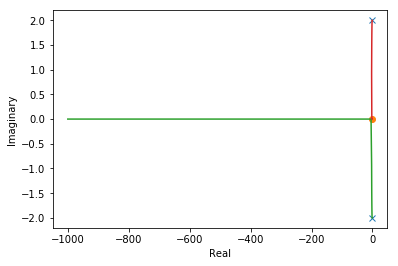

In [20]:
G=ctrl.tf([1,1],[1,2,5])
r,k=ctrl.rlocus(G, Plot=True)
zeros=G.zero()
poles=G.pole()

In [15]:
output_notebook()
numlines=len(r[0,:])
mypalette=viridis(numlines+1)
gain=np.ndarray((numlines,len(k)))
gain[0,:]=k
hover = HoverTool(tooltips=[
    ("gain", "@k"),
    ("Pole locaction", "@xs @ys j)"),
])

p = figure(plot_width=400, plot_height=400, x_range=(-5.2,0.2), 
           y_range=(-2.5,2.5), tools=["pan","wheel_zoom","box_zoom","save",
           "reset",hover],title="Root Locus")

for l in range(0,numlines):
    gain[l,:] = k
    source = ColumnDataSource (data = dict(xs=np.real(r[:,l].T).tolist(),
                                       ys= np.imag(r[:,l].T).tolist(), k=k.T))
    p.line('xs', 'ys', source=source, line_color= mypalette[l+1],line_width=3)

p.circle(np.real(zeros),np.imag(zeros), line_color= mypalette[0], 
         fill_color= mypalette[0], size=10, alpha=0.7,line_width=3)
p.x(np.real(poles),np.imag(poles), line_color= mypalette[0],
    size=10, alpha=0.7,line_width=3)
p.toolbar.logo=None
show(p)

Loading BokehJS ...

In [6]:
def in_ipynb():
    try:
        cfg = get_ipython().config 
        if cfg['IPKernelApp']['parent_appname'] == 'ipython-notebook':
            return True
        else:
            return False
    except NameError:
        return False
in_ipynb()

False

In [10]:
import os as os
os.environ['JPY_PARENT_PID']

'1128'